<a href="https://colab.research.google.com/github/NehaKumari500092077/Machine-Learning-Lab/blob/main/mid_semester.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Objective:**

You are to download the ***Student Performance*** dataset from [https://archive.ics.uci.edu/dataset/320/student+performance](https://archive.ics.uci.edu/dataset/320/student+performance) for this examination. This dataset contains 649 samples, with 30 features each. Note that the final three columns represent the following:

*   G1: 1st period grades
*   G2: 2nd period grades
*   G3: 3rd period (final year) grades

and both G1 and G2 are NOT to be considered as features.

Your task is to predict the final year (G3) grades of students from a test-set extracted from the given dataset, using ***Linear Regression***. In our laboratory session on Linear Regression, we had dealt with continuous features. The given dataset, however, has *binary*, *integer* and *continuous* features, which need to be handled appropriately.  

After performing the necessary checks for duplicate and missing values for any sample, you need to perform ***one-hot encoding*** for the categorical features. If a certain categorial feature can take *k* distinct values, you should represent it using (*k-1*) binary features. Also, display the number of features in the encoded feature set thus obtained.

Scale the features so that all their values remain in the same range, and split the entire dataset into ***70% (train) - 15% (validation) - 15% (test)***. Implement linear regression *from scratch* on the dataset, with ***gradient descent*** and the ***mean-squared error (MSE)*** loss function.

You are also required to implement ***learning rate scheduling*** as follows: Start with a high learning rate (***0.1***) and ***reduce it by a factor of 0.1*** whenever the loss on the validation set does not reduce for ***10 consecutive steps***. Stop training when the learning rate reaches a threshold (***10^-5***) and the loss does not reduce further.

Plot the progression of both training and validation losses, and report the MSE loss on the test-set. Finally, show a scatter plot of the predicted final grades against the true grades.





**Step 1: Load the Dataset**

Install the ucimlrepo package and then load the Student Performance dataset as a pandas dataframe.

In [69]:
pip install ucimlrepo

In [70]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
student_performance = fetch_ucirepo(id=320)

# data (as pandas dataframes)
X = student_performance.data.features
y = student_performance.data.targets

# metadata
print(student_performance.metadata)

# variable information
print(student_performance.variables)

{'uci_id': 320, 'name': 'Student Performance', 'repository_url': 'https://archive.ics.uci.edu/dataset/320/student+performance', 'data_url': 'https://archive.ics.uci.edu/static/public/320/data.csv', 'abstract': 'Predict student performance in secondary education (high school). ', 'area': 'Social Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 649, 'num_features': 30, 'feature_types': ['Integer'], 'demographics': ['Sex', 'Age', 'Other', 'Education Level', 'Occupation'], 'target_col': ['G1', 'G2', 'G3'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5TG7T', 'creators': ['Paulo Cortez'], 'intro_paper': {'title': 'Using data mining to predict secondary school student performance', 'authors': 'P. Cortez, A. M. G. Silva', 'published_in': 'Proceedings of 5th Annual Future Business Technology Conference', 'year'

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [84]:
dataset = pd.read_csv('https://archive.ics.uci.edu/static/public/320/data.csv')
dataset.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


**Step 2: Check for Duplicates and Missing Values (2 marks)**

Check for any duplicate entries and missing values.

In [85]:
duplicate_values = dataset.duplicated().sum()
print("No of duplicate values: ", duplicate_values)

missing_values = dataset.isnull().sum()
print("No of missing values: ", missing_values)

No of duplicate values:  0
No of missing values:  school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


**Step 3: One-Hot Encoding for Categorical Features (2 marks)**

Identify categorical features and perform one-hot encoding. (Drop features "G1" and "G2")

In [86]:
dataset.drop(['G1', 'G2'], axis = 1, inplace = True)




In [87]:
#select the categorical feature
categorical_feature = dataset.select_dtypes(include=['object']).columns

#select numerical features
numerical_features = dataset.select_dtypes(include = ['float64', 'int64']).columns

#Perform one-hot encoding
dataset = pd.get_dummies(dataset, columns=categorical_feature, drop_first=True)

dataset.head()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,True,False,True,False,False,False,True,True,False,False
1,17,1,1,1,2,0,5,3,3,1,...,False,False,False,True,False,False,False,True,True,False
2,15,1,1,1,2,0,4,3,2,2,...,True,False,True,False,False,False,True,True,True,False
3,15,4,2,1,3,0,3,2,2,1,...,True,False,False,True,False,True,True,True,True,True
4,16,3,3,1,2,0,4,3,2,1,...,False,False,False,True,False,False,True,True,False,False


**Step 4: Feature Scaling (2 marks)**

Normalize the features to ensure all are within the same range, between 0 and 1.

In [88]:
#create an instance
scaler = MinMaxScaler()

#fit and transform the data to normalize it
dataset[numerical_features] = scaler.fit_transform(dataset[numerical_features])


**Step 5: Split Data into Training, Validation, and Test Sets (1 mark)**

Split the data into 70% training, 15% validation, and 15% test sets.

In [89]:
X_train, X_test, Y_train, Y_test = train_test_split(dataset.drop('G3', axis=1), dataset['G3'], test_size=0.3, random_state=42)
X_validation, X_test, Y_validation, Y_test = train_test_split(X_test, Y_test, test_size=0.5, random_state=42)

**Step 6: Implement Linear Regression from Scratch (8 marks)**

Implement linear regression using gradient descent and mean squared error (MSE) as the loss function.

In [90]:

# take a weight and initialise with random values
weights = np.random.rand(X_train.shape[1])

# set initially the high learning rate as 0.1
learningRate = 0.1

# Set the learning rate decay factor (reduce learning rate by a factor of 0.1)
reduce_factor = 0.1

# Setting the learning rate threshold
threshold_of_learningRate = 1e-5

# Setting the no of iterations without improvement to trigger learning rate decay
patience = 10

# Initializing the no. of iterations without improvement
improvement_count = 0

# Initializing the best validation loss
best_validation_loss = float('inf')

# set the number of iterations
num_of_iterations = 1000

# Initialize two list for training and validation losses
training_losses = []
validation_losses = []

# Performing gradient descent with learning rate scheduling
for i in range(num_of_iterations):

  # Calculate the predictions
  predictions = np.dot(X_train, weights)

  # Calculating the error
  error = predictions - Y_train

  # Calculate the gradient
  gradient = np.dot(X_train.T, error) / len(Y_train)

  # Update the weights
  weights = weights - learningRate * gradient

  # Calculate the training loss using mean square error
  training_loss = mean_squared_error(Y_train, predictions)

  # Calculate the validation loss
  validation_predictions = np.dot(X_validation, weights)
  validation_loss = mean_squared_error(Y_validation, validation_predictions)

  # Append the training and validation losses to the lists
  training_losses.append(training_loss)
  validation_losses.append(validation_loss)

  # Check if the validation loss has improved
  if validation_loss < best_validation_loss:
    best_validation_loss = validation_loss
    improvement_count = 0
  else:
    improvement_count += 1

  # If the validation loss has not improved for 'patience' iterations, reduce the learning rate
  if improvement_count >= patience:
    learningRate *= reduce_factor
    improvement_count = 0

    # Stop training if the learning rate has reached the threshold
    if learningRate < threshold_of_learningRate:
      break

  # Printing the losses at every 100 iterations
  if i % 100 == 0:
    print("Iteration:", i, "Training loss:", training_loss, "Validation loss:", validation_loss, "Learning rate:", learningRate)





Iteration: 0 Training loss: 59.373472255060136 Validation loss: 1.951258309592731 Learning rate: 0.1
Iteration: 100 Training loss: 0.10259999281278985 Validation loss: 0.10995576111272833 Learning rate: 0.1
Iteration: 200 Training loss: 0.04860155215116879 Validation loss: 0.05605059568228004 Learning rate: 0.1
Iteration: 300 Training loss: 0.033563813466631884 Validation loss: 0.040207163783313016 Learning rate: 0.1
Iteration: 400 Training loss: 0.027746699586262382 Validation loss: 0.033950644297363636 Learning rate: 0.1
Iteration: 500 Training loss: 0.02507711459794672 Validation loss: 0.03097673376613189 Learning rate: 0.1
Iteration: 600 Training loss: 0.023707111238053656 Validation loss: 0.029321778324352586 Learning rate: 0.1
Iteration: 700 Training loss: 0.022946541793132245 Validation loss: 0.028277774777037575 Learning rate: 0.1
Iteration: 800 Training loss: 0.02249963935341065 Validation loss: 0.027557779686365764 Learning rate: 0.1
Iteration: 900 Training loss: 0.0222257835

**Step 7: Plot the Training and Validation Losses (1 mark)**

Plot the variation of training and validation losses with training progress.

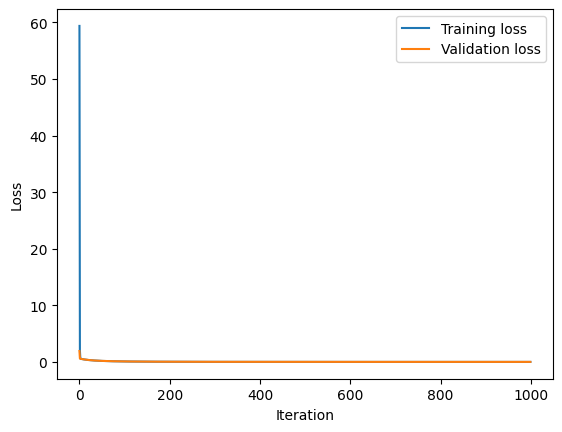

In [91]:

plt.plot(training_losses, label="Training loss")
plt.plot(validation_losses, label="Validation loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Step 8: Evaluate Model on Test Set (2 marks)**

In [92]:

testData_predictions = np.dot(X_test, weights)
testData_loss = mean_squared_error(Y_test, testData_predictions)
print("Loss on Test Data (Mean Square Error):", testData_loss)

Loss on Test Data (Mean Square Error): 0.028587057067128954


**Step 9: Scatter Plot of Predicted vs. True Grades (2 marks)**

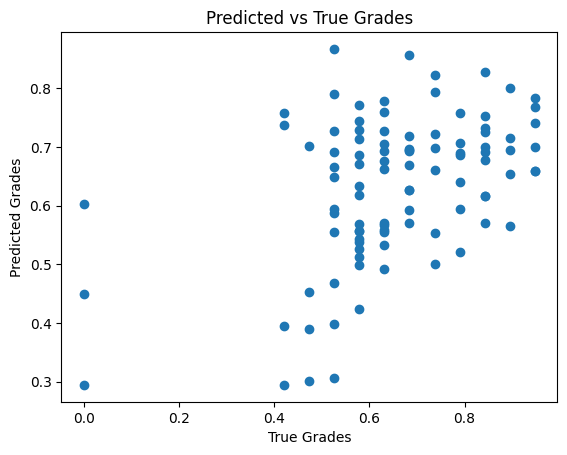

In [93]:
plt.scatter(Y_test, testData_predictions)
plt.xlabel("True Grades")
plt.ylabel("Predicted Grades")
plt.title("Predicted vs True Grades")
plt.show()